#EDA for the Google playstore dataset

1. Data cleaning
2. Classification of variables based on the underlying data


#Importing of the modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib INLINE

In [2]:
df_googleplaystore = pd.read_csv('Dataset/googleplaystore_original.csv')

In [3]:
df_googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Getting the basic information about the columns

In [4]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#To descibe the data of the columns 

In [5]:
df_googleplaystore.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Let us create a new dictionary with key as name of the column and the values as the unique values of a column and the datatype of the column 

In [6]:
df_googleplaystore_columns = {}
for i in df_googleplaystore.columns:
    df_googleplaystore_columns[i] = [df_googleplaystore[i].unique(),df_googleplaystore[i].dtype]

In [7]:
df_googleplaystore_columns

{'App': [array(['Photo Editor & Candy Camera & Grid & ScrapBook',
         'Coloring book moana',
         'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
         'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
         'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object),
  dtype('O')],
 'Category': [array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
         'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
         'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
         'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
         'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
         'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
         'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
         'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
         '1.9'], dtype=object),
  dtype('O')],
 'Rating': [array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4, 

#Observations for data cleansing: 

    1. The datatype of Reviews is object. This should be converted into the integer by removing the non numeric values in it. 
    
    2. The values in Size column have been mentioned in MB and KB as well. We need to convert them into bytes.(1 MB = 1024*1024 Bytes,1kb = 1024 Bytes
    
    3. The values in Installs column have + symbol. These needs to be removed, so that this column can be converted into                integer. We have a word "Free" in this column. This also needs to be replaced with NaN, so that it can be converted into        the numeric column.
    
    4. The values in the Price column are numeric characters. We need to remove dollar ($) sign and convert this column into a numeric column.
    
    5. The values in 'Last Updated" are of date in nature. However, the datatype of the column is object. Hence, this needs to be converted into the Datetime. 
    

In [8]:
df_googleplaystore[~df_googleplaystore['Reviews'].str.isnumeric()] #= df_googleplaystore['Reviews'].astype(float)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df_googleplaystore['Reviews'] = df_googleplaystore['Reviews'].replace('3.0M','3000000')

In [10]:
df_googleplaystore['Reviews'] = df_googleplaystore['Reviews'].astype(float)

In [11]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [12]:
#2. The values in Size column have been mentioned in MB and KB as well. We need to convert them into bytes.(1 MB = 1024*1024 Bytes,1kb = 1024 Bytes
for i in df_googleplaystore['Size']:
    num_kb = 0 
    if 'M' in str(i):
        num_kb = 1024*1024
        num_kb = float(i.replace('M',""))*num_kb
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)
    elif 'k' in str(i):
        num_kb = 1024
        num_kb = float(i.replace('k',""))*num_kb
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)
    elif 'K' in str(i):
        num_kb = 1024
        num_kb = float(i.replace('K',""))*num_kb
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)
    elif 'Varies with device' in str(i): 
        num_kb = np.NaN
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)

for i in df_googleplaystore['Size']:
    if '+' in str(i):
        num_kb = i.replace('+',"")
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)
        

for i in df_googleplaystore['Size']:
    if ',' in str(i):
        num_kb = i.replace(',',"")
        df_googleplaystore['Size'] = df_googleplaystore['Size'].replace(i,num_kb)
        
    

In [13]:
df_googleplaystore['Size'].unique()

array([19922944.0, 14680064.0, 9122611.2, 26214400.0, 2936012.8,
       5872025.6, 30408704.0, 34603008.0, 3250585.6, 29360128.0,
       12582912.0, 20971520.0, 22020096.0, 38797312.0, 2831155.2,
       5767168.0, 17825792.0, 40894464.0, 32505856.0, 4404019.2,
       7340032.0, 24117248.0, 6291456.0, 6396313.6, 4823449.6, 9646899.2,
       5452595.2, 11534336.0, 25165824.0, nan, 9856614.4, 15728640.0,
       10485760.0, 1258291.2, 27262976.0, 8388608.0, 8283750.4,
       58720256.0, 59768832.0, 36700160.0, 56623104.0, 205824.0,
       3774873.6, 5976883.2, 9017753.6, 2516582.4, 28311552.0, 2621440.0,
       16777216.0, 3565158.4, 9332326.4, 4089446.4, 3040870.4, 39845888.0,
       33554432.0, 5662310.4, 18874368.0, 1153433.6, 2306867.2, 4718592.0,
       10276044.8, 54525952.0, 9437184.0, 7025459.2, 31457280.0,
       2726297.6, 7444889.6, 3879731.2, 23068672.0, 7759462.4, 6710886.4,
       3355443.2, 8598323.2, 10380902.4, 5138022.4, 9961472.0, 5242880.0,
       6186598.4, 13631488.0,

In [14]:
df_googleplaystore['Size'] = df_googleplaystore['Size'].astype(float)

In [15]:
df_googleplaystore['Size'].unique()

array([1.99229440e+07, 1.46800640e+07, 9.12261120e+06, 2.62144000e+07,
       2.93601280e+06, 5.87202560e+06, 3.04087040e+07, 3.46030080e+07,
       3.25058560e+06, 2.93601280e+07, 1.25829120e+07, 2.09715200e+07,
       2.20200960e+07, 3.87973120e+07, 2.83115520e+06, 5.76716800e+06,
       1.78257920e+07, 4.08944640e+07, 3.25058560e+07, 4.40401920e+06,
       7.34003200e+06, 2.41172480e+07, 6.29145600e+06, 6.39631360e+06,
       4.82344960e+06, 9.64689920e+06, 5.45259520e+06, 1.15343360e+07,
       2.51658240e+07,            nan, 9.85661440e+06, 1.57286400e+07,
       1.04857600e+07, 1.25829120e+06, 2.72629760e+07, 8.38860800e+06,
       8.28375040e+06, 5.87202560e+07, 5.97688320e+07, 3.67001600e+07,
       5.66231040e+07, 2.05824000e+05, 3.77487360e+06, 5.97688320e+06,
       9.01775360e+06, 2.51658240e+06, 2.83115520e+07, 2.62144000e+06,
       1.67772160e+07, 3.56515840e+06, 9.33232640e+06, 4.08944640e+06,
       3.04087040e+06, 3.98458880e+07, 3.35544320e+07, 5.66231040e+06,
      

In [16]:
#3. The values in Installs column have + symbol. These needs to be removed, so that this column can be converted into                integer. We have a word "Free" in this column. This also needs to be replaced with NaN, so that it can be converted into        the numeric column.
df_googleplaystore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [17]:
for i in df_googleplaystore['Installs']:
    if '+' in i : 
        j = i.replace('+',"")
        df_googleplaystore['Installs'] = df_googleplaystore['Installs'].replace(i,j)

In [18]:
df_googleplaystore['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0', 'Free'], dtype=object)

In [19]:
df_googleplaystore['Installs'] = df_googleplaystore['Installs'].replace('Free',np.NaN)

In [20]:
df_googleplaystore['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0', nan], dtype=object)

In [21]:
for i in df_googleplaystore['Installs']:
    if ',' in str(i):
        j = i.replace(",","")
        df_googleplaystore['Installs'] = df_googleplaystore['Installs'].replace(i,j)

In [22]:
df_googleplaystore['Installs'] = df_googleplaystore['Installs'].astype(float)

In [23]:
df_googleplaystore['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [24]:
#4. The values in the Price column are numeric characters. We need to remove dollar ($) sign and convert this column into a numeric column.
for i in df_googleplaystore['Price']:
    if '$' in i:
        j = i.replace('$',"")
        df_googleplaystore['Price'] = df_googleplaystore['Price'].replace(i,j)

In [25]:
df_googleplaystore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [26]:
df_googleplaystore['Price'] = df_googleplaystore['Price'].replace('Everyone',np.NaN)

In [27]:
df_googleplaystore['Price'] = df_googleplaystore['Price'].astype(float)

In [28]:
df_googleplaystore['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [29]:
#5. The values in 'Last Updated" are of date in nature. However, the datatype of the column is object. Hence, this needs to be converted into the Datetime. 
df_googleplaystore['Last Updated'] = df_googleplaystore['Last Updated'].replace('1.0.19',np.NaN)

df_googleplaystore['Last Updated'] = pd.to_datetime(df_googleplaystore['Last Updated']) 


In [30]:
df_googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  float64       
 4   Size            9146 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [31]:
#Write the result into a new CSV file. 
df_googleplaystore.to_csv(r'Dataset\googleplaystore_cleaned.csv',index=False)

In [32]:
#to check the distribution of numeric columns

In [33]:
number_cols = [i for i in df_googleplaystore.columns if df_googleplaystore[i].dtype in ('int','float64')]

In [34]:
number_cols

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

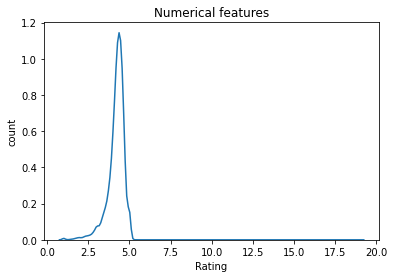

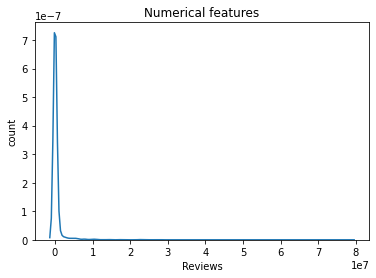

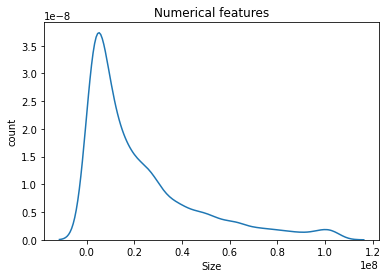

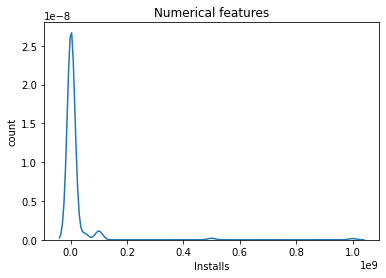

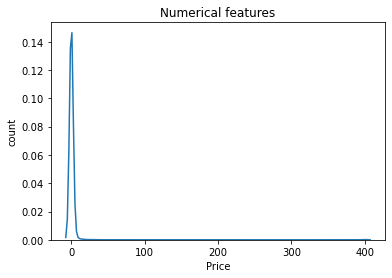

In [35]:
for feature in number_cols:
    sns.kdeplot(df_googleplaystore[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Numerical features')
    plt.show()

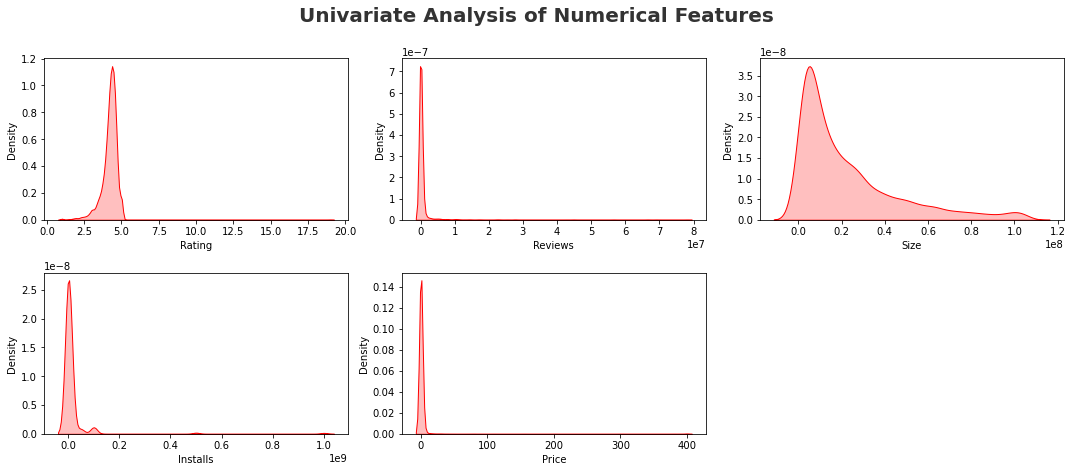

In [36]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(number_cols)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_googleplaystore[number_cols[i]],shade=True,color = 'r')
    plt.xlabel(number_cols[i])
    plt.tight_layout()

#Observations : 
1. Ratings, is left skewed distribution.
2. Reviews,size,installs,price is right skewed distribution


In [37]:
cat_df = [ i for i in df_googleplaystore.columns if df_googleplaystore[i].dtype == 'O']

In [38]:
cat_df

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [39]:
df_googleplaystore['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

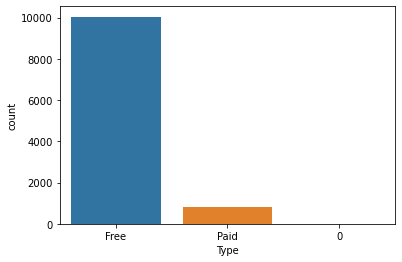

In [40]:
sns.countplot(df_googleplaystore['Type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='count'>

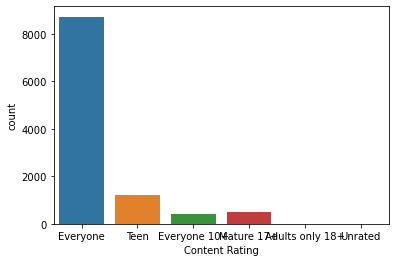

In [41]:
sns.countplot(df_googleplaystore['Content Rating'])

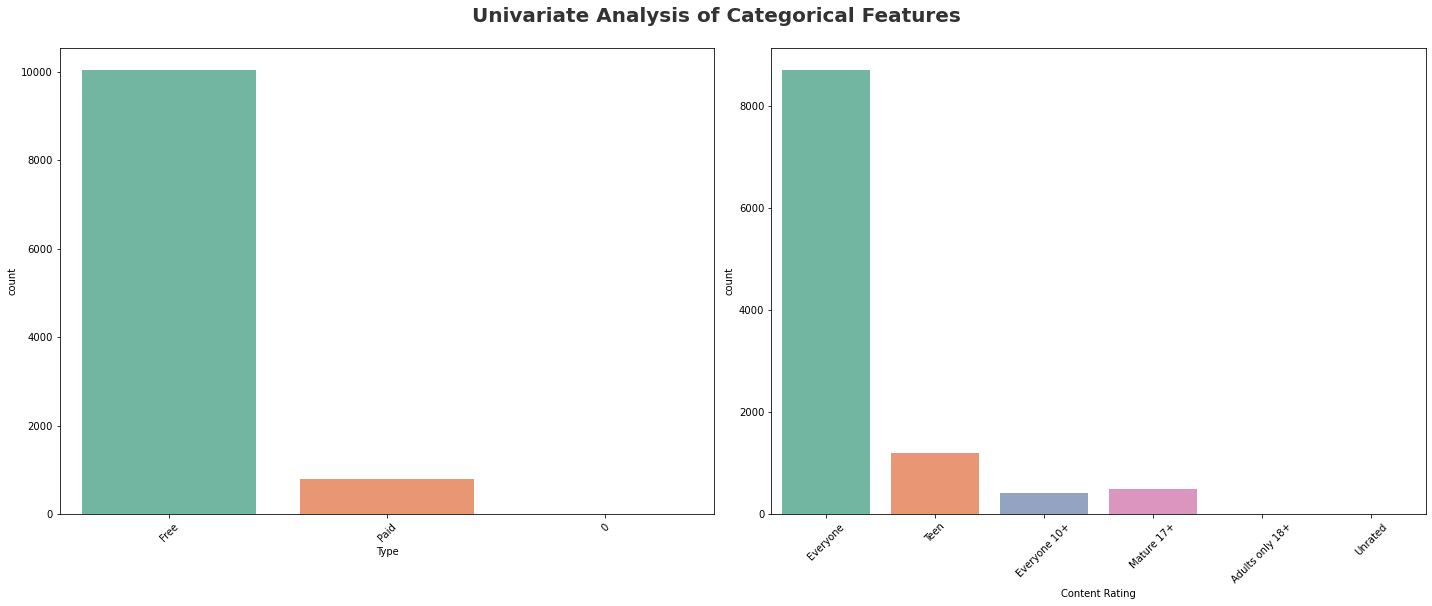

In [42]:
#categoricla columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df_googleplaystore[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [43]:
df_googleplaystore['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

#Which one is most popular category ? 

<AxesSubplot:ylabel='Category'>

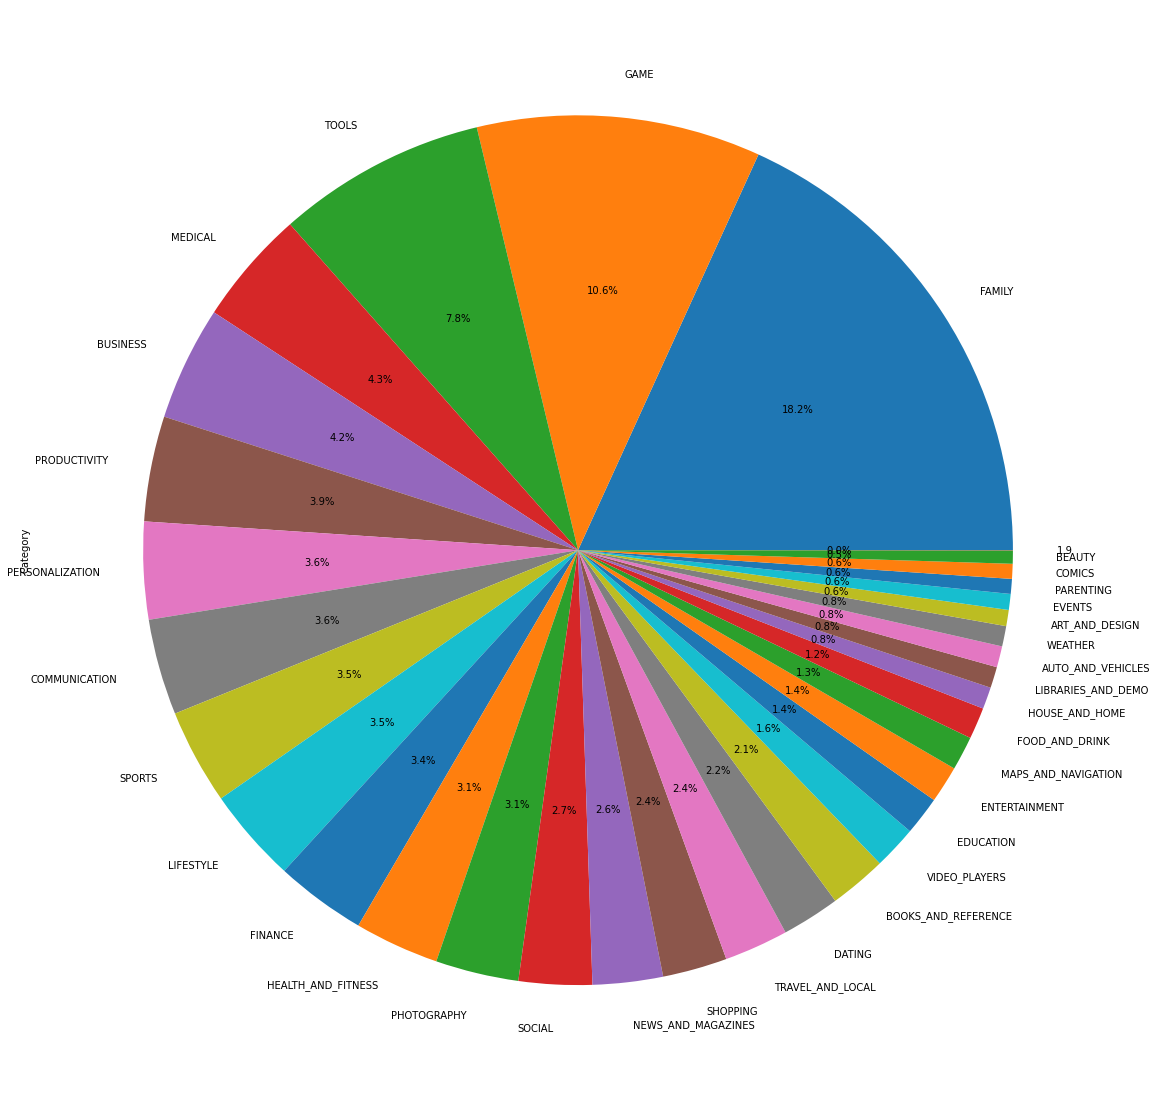

In [44]:
df_googleplaystore['Category'].value_counts().plot.pie(figsize=(20,20),autopct='%1.1f%%')

In [45]:
#Observation: Family is the most popular category. 

In [46]:
#What are the top ten categories in Google playstores? 

In [47]:
category = pd.DataFrame(df_googleplaystore['Category'].value_counts())

In [48]:
category.rename(columns={'Category':'Count'},inplace=True)

In [49]:
category.head(10)

,Count
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


<AxesSubplot:ylabel='Count'>

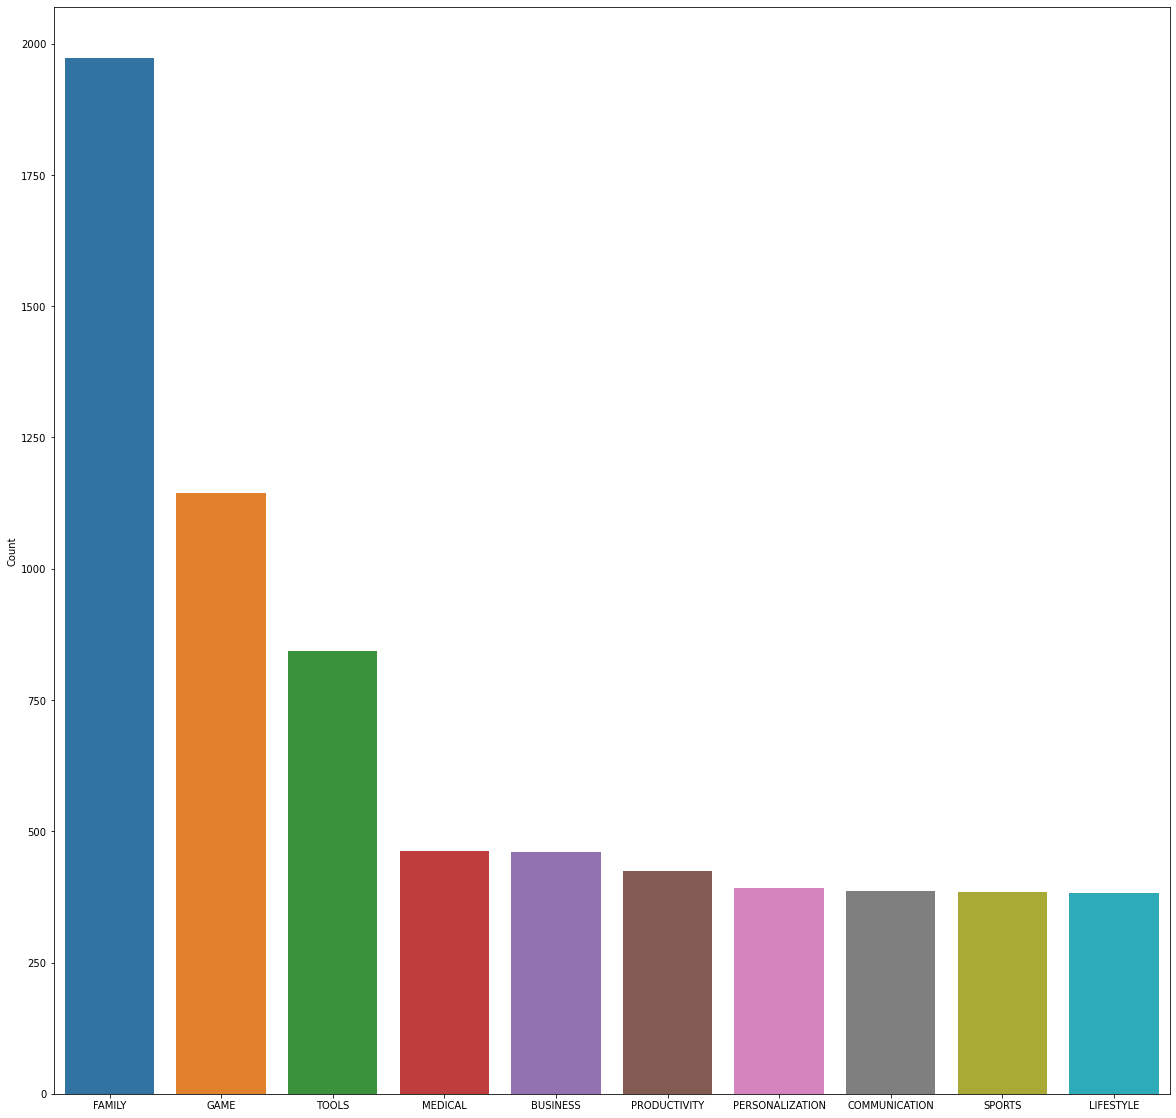

In [50]:
plt.figure(figsize=(20,20))
sns.barplot(x=category.index[:10],y='Count',data=category[:10])

In [51]:
df_googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [52]:
#Which category has largest no of installations ?

In [53]:
cat_df

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [54]:
df_googleplaystore.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   3.508602e+10
COMMUNICATION          3.264728e+10
PRODUCTIVITY           1.417609e+10
SOCIAL                 1.406987e+10
TOOLS                  1.145277e+10
FAMILY                 1.025826e+10
PHOTOGRAPHY            1.008825e+10
NEWS_AND_MAGAZINES     7.496318e+09
TRAVEL_AND_LOCAL       6.868887e+09
VIDEO_PLAYERS          6.222003e+09
SHOPPING               3.247849e+09
ENTERTAINMENT          2.869160e+09
PERSONALIZATION        2.325495e+09
BOOKS_AND_REFERENCE    1.921470e+09
SPORTS                 1.751174e+09
HEALTH_AND_FITNESS     1.583073e+09
BUSINESS               1.001915e+09
FINANCE                8.766487e+08
EDUCATION              8.714520e+08
MAPS_AND_NAVIGATION    7.242819e+08
LIFESTYLE              5.376435e+08
WEATHER                4.261005e+08
FOOD_AND_DRINK         2.738988e+08
DATING                 2.643108e+08
HOUSE_AND_HOME         1.687125e+08
ART_AND_DESIGN         1.243381e+08
LIBRARIES_AND_DEMO     6.299591e+07
COMICS             

In [55]:
df_googleplaystore.groupby('Category')['Installs'].sum().nlargest(10)

Category
GAME                  3.508602e+10
COMMUNICATION         3.264728e+10
PRODUCTIVITY          1.417609e+10
SOCIAL                1.406987e+10
TOOLS                 1.145277e+10
FAMILY                1.025826e+10
PHOTOGRAPHY           1.008825e+10
NEWS_AND_MAGAZINES    7.496318e+09
TRAVEL_AND_LOCAL      6.868887e+09
VIDEO_PLAYERS         6.222003e+09
Name: Installs, dtype: float64

<AxesSubplot:ylabel='Installs'>

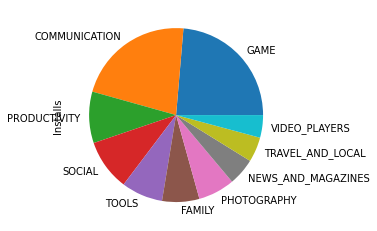

In [56]:
df_googleplaystore.groupby('Category')['Installs'].sum().nlargest(10).plot.pie()

In [57]:
#How many apps are there on google play sotre which gets 5 ratings

In [58]:
df_googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [59]:
df_googleplaystore[df_googleplaystore['Rating'] >=5.0]['App'].count()

275

In [60]:
#Does Size of the application has any impact on its popularity?

<AxesSubplot:xlabel='Size', ylabel='Rating'>

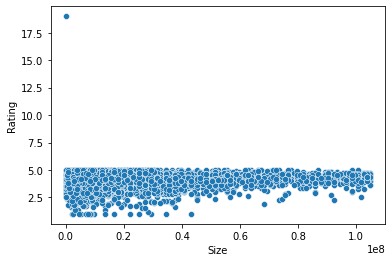

In [61]:
sns.scatterplot(x='Size',y='Rating',data=df_googleplaystore)

In [62]:
#What are the top 5 most installed apps in each popular category

In [63]:
df_googleplaystore.groupby(['Category'])['Installs'].sum().nlargest(10)

Category
GAME                  3.508602e+10
COMMUNICATION         3.264728e+10
PRODUCTIVITY          1.417609e+10
SOCIAL                1.406987e+10
TOOLS                 1.145277e+10
FAMILY                1.025826e+10
PHOTOGRAPHY           1.008825e+10
NEWS_AND_MAGAZINES    7.496318e+09
TRAVEL_AND_LOCAL      6.868887e+09
VIDEO_PLAYERS         6.222003e+09
Name: Installs, dtype: float64

In [64]:
df_googleplaystore['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

<AxesSubplot:ylabel='Type'>

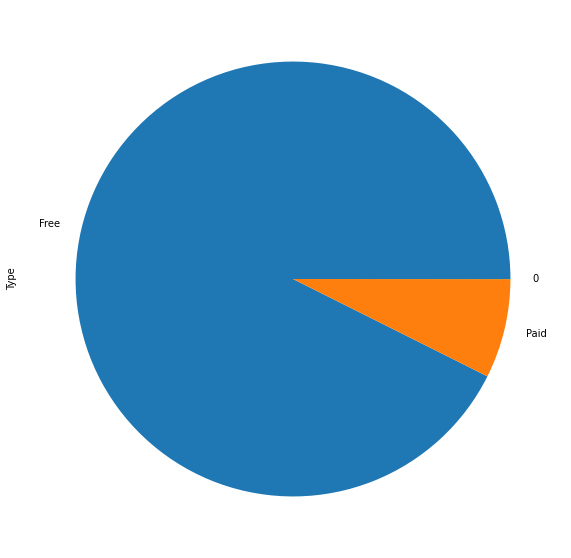

In [65]:
df_googleplaystore['Type'].value_counts().plot(kind='pie',figsize=(10,10))

In [66]:
#Which category app users are reviewing the most ? 

In [67]:
df_googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [68]:
df_googleplaystore.groupby('Category')['Reviews'].sum().nlargest(10)

Category
GAME               1.585422e+09
COMMUNICATION      8.154623e+08
SOCIAL             6.212414e+08
FAMILY             4.102263e+08
TOOLS              2.731850e+08
PHOTOGRAPHY        2.135166e+08
SHOPPING           1.150412e+08
PRODUCTIVITY       1.141170e+08
VIDEO_PLAYERS      1.103802e+08
PERSONALIZATION    8.934614e+07
Name: Reviews, dtype: float64

In [69]:
#which kind of app user are downloading the most free/paid ? 

In [70]:
df_googleplaystore.groupby(['Type','Category'])['Installs'].sum().sort_values(ascending=False)

Type  Category          
Free  GAME                  3.506492e+10
      COMMUNICATION         3.264592e+10
      PRODUCTIVITY          1.417468e+10
      SOCIAL                1.406986e+10
      TOOLS                 1.145104e+10
                                ...     
Paid  SOCIAL                6.000000e+03
      NEWS_AND_MAGAZINES    5.500000e+03
      LIBRARIES_AND_DEMO    1.000000e+02
      EVENTS                1.000000e+00
0     1.9                   0.000000e+00
Name: Installs, Length: 64, dtype: float64

In [71]:
#Handling Missing values in the dataframe

In [72]:
#To identify the null values in the dataframe

In [73]:
df_googleplaystore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

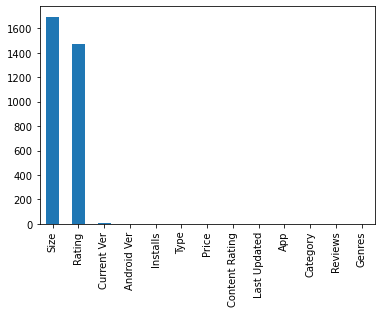

In [74]:
df_googleplaystore.isna().sum().sort_values(ascending=False).plot(kind='bar')

In [75]:
df_copy = df_googleplaystore.copy()

In [76]:

cols = [i for i in df_copy.columns if df_copy[i].isnull().mean()]

In [77]:
cols

['Rating',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [78]:
df_copy[cols].head()

,Rating,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,4.1,19922944.0,10000.0,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up
1,3.9,14680064.0,500000.0,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up
2,4.7,9122611.2,5000000.0,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,4.5,26214400.0,50000000.0,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up
4,4.3,2936012.8,100000.0,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up


In [79]:
df_copy['Last Updated'].dtype

dtype('<M8[ns]')

In [80]:
for i in cols:
    for j in ['_med','_mod','_mean','dropna']:
        new_col_name = i+j
        
        df_copy[new_col_name] = df_copy[i]
        
        
        if j == '_mod':
            df_copy[new_col_name] = df_copy[new_col_name].fillna(df_copy[new_col_name].mode())
            
        if j == 'dropna':
            df_copy[new_col_name] = df_copy[new_col_name].fillna(df_copy[new_col_name].dropna())
            
        if df_copy[i].dtype in ('int','float64','<M8[ns]'):
            if j == '_med' :
                df_copy[new_col_name] = df_copy[new_col_name].fillna(df_copy[new_col_name].median())
            
            if j == '_mean':
                df_copy[new_col_name] = df_copy[new_col_name].fillna(df_copy[new_col_name].mean())
            

In [81]:
df_copy.head().T

,0,1,2,3,4
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159.0,967.0,87510.0,215644.0,967.0
Size,19922944.0,14680064.0,9122611.2,26214400.0,2936012.8
Installs,10000.0,500000.0,5000000.0,50000000.0,100000.0
Type,Free,Free,Free,Free,Free
Price,0.0,0.0,0.0,0.0,0.0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity


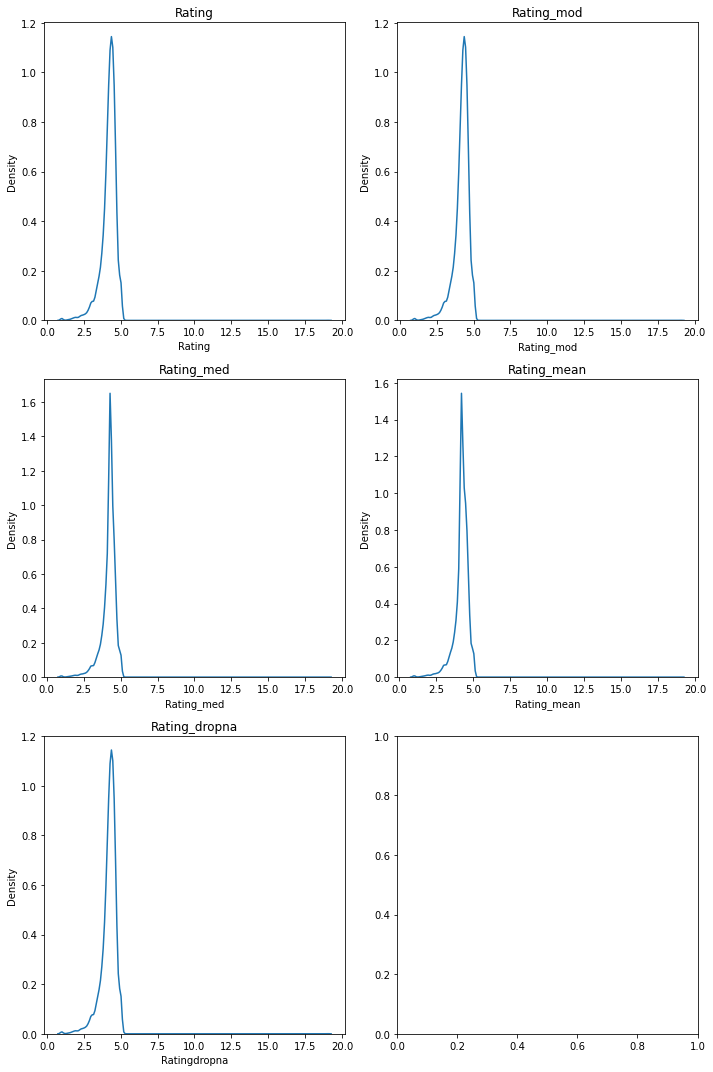

In [82]:
fig,axes = plt.subplots(3,2,figsize=(10,15))
sns.kdeplot(df_copy['Rating'],ax=axes[0,0])
axes[0,0].set_title('Rating')
sns.kdeplot(df_copy['Rating_mod'],ax=axes[0,1])
axes[0,1].set_title('Rating_mod')
sns.kdeplot(df_copy['Rating_med'],ax=axes[1,0])
axes[1,0].set_title('Rating_med')
sns.kdeplot(df_copy['Rating_mean'],ax=axes[1,1])
axes[1,1].set_title('Rating_mean')
sns.kdeplot(df_copy['Ratingdropna'],ax=axes[2,0])
axes[2,0].set_title('Rating_dropna')

plt.tight_layout()

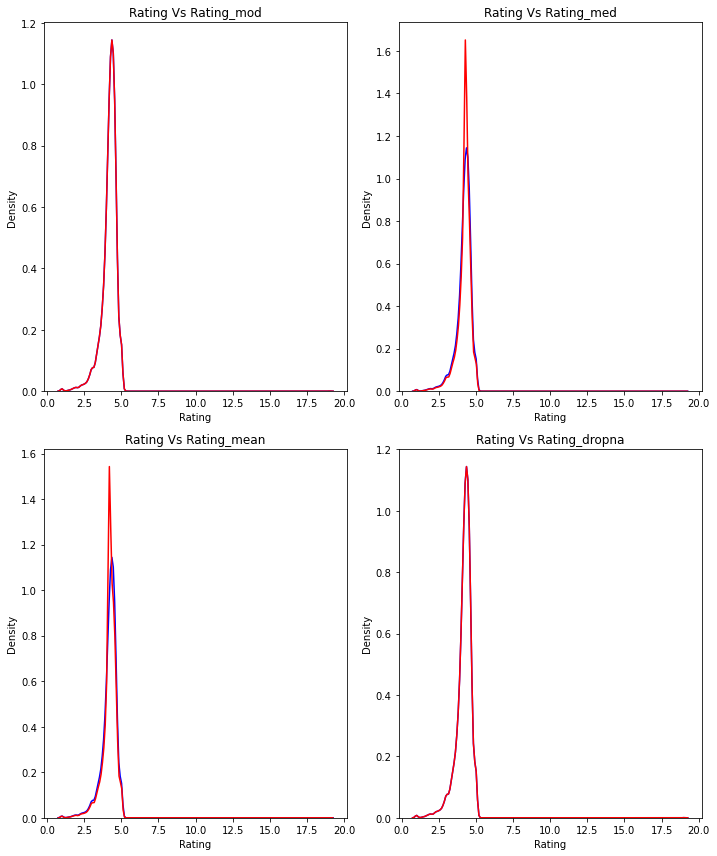

In [90]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,12))
sns.kdeplot(df_copy['Rating'],color='blue',ax=axes[0,0])
sns.kdeplot(df_copy['Rating_mod'],color='red',ax=axes[0,0])
axes[0,0].set_title("Rating Vs Rating_mod")
sns.kdeplot(df_copy['Rating'],color='blue',ax=axes[0,1])
sns.kdeplot(df_copy['Rating_med'],color='red',ax=axes[0,1])
axes[0,1].set_title("Rating Vs Rating_med")
sns.kdeplot(df_copy['Rating'],color='blue',ax=axes[1,0])
sns.kdeplot(df_copy['Rating_mean'],color='red',ax=axes[1,0])
axes[1,0].set_title("Rating Vs Rating_mean")
sns.kdeplot(df_copy['Rating'],color='blue',ax=axes[1,1])
sns.kdeplot(df_copy['Ratingdropna'],color='red',ax=axes[1,1])
axes[1,1].set_title("Rating Vs Rating_dropna")
plt.tight_layout()

In [84]:
Observations : 
    1. In the rating column, you can go for dropna or the replacing the null values with mode values. These two methods are not 
    altering the distribution. In the rest of the methods such as using the median or mean, the distribution is getting altered. 
    

()

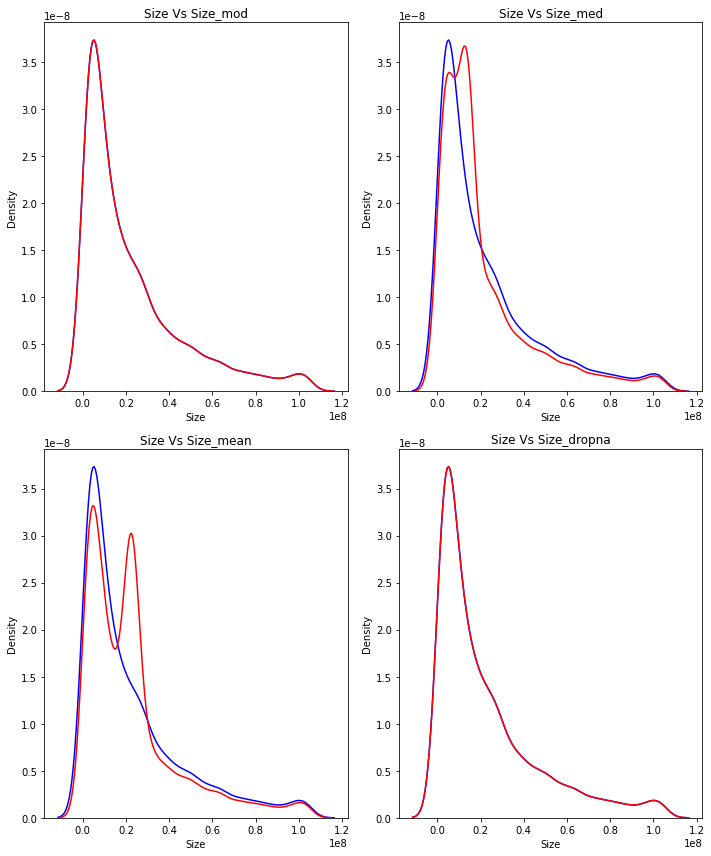

In [91]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,12))
sns.kdeplot(df_copy['Size'],color='blue',ax=axes[0,0])
sns.kdeplot(df_copy['Size_mod'],color='red',ax=axes[0,0])
axes[0,0].set_title("Size Vs Size_mod")
sns.kdeplot(df_copy['Size'],color='blue',ax=axes[0,1])
sns.kdeplot(df_copy['Size_med'],color='red',ax=axes[0,1])
axes[0,1].set_title("Size Vs Size_med")
sns.kdeplot(df_copy['Size'],color='blue',ax=axes[1,0])
sns.kdeplot(df_copy['Size_mean'],color='red',ax=axes[1,0])
axes[1,0].set_title("Size Vs Size_mean")
sns.kdeplot(df_copy['Size'],color='blue',ax=axes[1,1])
sns.kdeplot(df_copy['Sizedropna'],color='red',ax=axes[1,1])
axes[1,1].set_title("Size Vs Size_dropna")
plt.tight_layout()

In [ ]:
Observations : 
    1. In the Size column, you can go for dropna or the replacing the null values with mode values. These two methods are not 
    altering the distribution. In the rest of the methods such as using the median or mean, the distribution is getting altered. 